<a href="https://colab.research.google.com/github/L-SanthoshKumar/FETAL-HEALTH-AI/blob/main/Fetal-Health-AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')


In [ ]:
# Display the first few rows of the dataset

display(data)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,73,0.5,43,2.4,2
1,132,0.006,0.000,0.006,0.003,0.0,17,2.1,0,10.4,1
2,133,0.003,0.000,0.008,0.003,0.0,16,2.1,0,13.4,1
3,134,0.003,0.000,0.008,0.003,0.0,16,2.4,0,23.0,1
4,132,0.007,0.000,0.008,0.000,0.0,16,2.4,0,19.9,1
...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,79,0.2,25,7.2,2
2122,140,0.001,0.000,0.007,0.000,0.0,78,0.4,22,7.1,2
2123,140,0.001,0.000,0.007,0.000,0.0,79,0.4,20,6.1,2
2124,140,0.001,0.000,0.006,0.000,0.0,78,0.4,27,7.0,2


In [ ]:
# Define features (X) and target variable (y)
X = data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
          'light_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability',
          'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
          'mean_value_of_long_term_variability']]
y = data['fetal_health']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**RANDOM FOREST**

---



In [ ]:
report = classification_report(y_test, rf_predictions)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       328
           2       0.87      0.73      0.80        64
           3       0.97      0.91      0.94        34

    accuracy                           0.94       426
   macro avg       0.93      0.88      0.90       426
weighted avg       0.94      0.94      0.94       426



In [ ]:
# Initialize a list to store accuracies
accuracies = []

In [ ]:
rf_accuracies = []
accuracies = []
total_accuracy = 0
# Perform 20 iterations
for i in range(20):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Random Forest model
    random_forest_model = RandomForestClassifier(random_state=i, n_estimators=100)
    random_forest_model.fit(X_train, y_train)
    rf_predictions = random_forest_model.predict(X_test)

    # Calculate accuracy and store it
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    accuracies.append(rf_accuracy)
    total_accuracy += rf_accuracy

    print(f'Iteration {i+1} Random Forest  Accuracy: {rf_accuracy}')


Iteration 1 Random Forest  Accuracy: 0.9295774647887324
Iteration 2 Random Forest  Accuracy: 0.9389671361502347
Iteration 3 Random Forest  Accuracy: 0.9366197183098591
Iteration 4 Random Forest  Accuracy: 0.960093896713615
Iteration 5 Random Forest  Accuracy: 0.9553990610328639
Iteration 6 Random Forest  Accuracy: 0.9342723004694836
Iteration 7 Random Forest  Accuracy: 0.9389671361502347
Iteration 8 Random Forest  Accuracy: 0.9413145539906104
Iteration 9 Random Forest  Accuracy: 0.9530516431924883
Iteration 10 Random Forest  Accuracy: 0.9436619718309859
Iteration 11 Random Forest  Accuracy: 0.9483568075117371
Iteration 12 Random Forest  Accuracy: 0.9389671361502347
Iteration 13 Random Forest  Accuracy: 0.9507042253521126
Iteration 14 Random Forest  Accuracy: 0.9389671361502347
Iteration 15 Random Forest  Accuracy: 0.931924882629108
Iteration 16 Random Forest  Accuracy: 0.960093896713615
Iteration 17 Random Forest  Accuracy: 0.9483568075117371
Iteration 18 Random Forest  Accuracy: 0.936

In [ ]:
# Calculate the average accuracy
average_accuracy = total_accuracy / 20
print(f'Average Random Forest Accuracy over 20 iterations: {average_accuracy}')

Average Random Forest Accuracy over 20 iterations: 0.9437793427230046


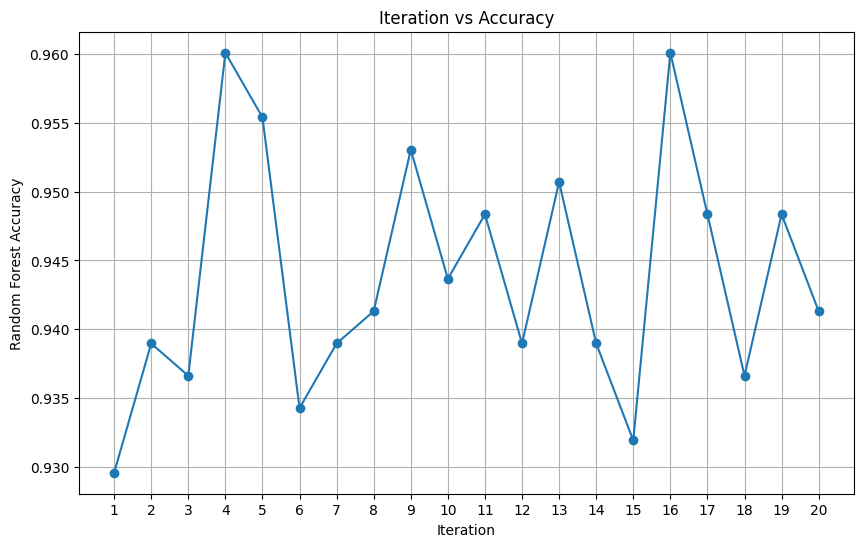

In [ ]:
# Plot the accuracies for each iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), accuracies, marker='o')
plt.xticks(range(1, len(accuracies) + 1))
plt.xlabel('Iteration')
plt.ylabel('Random Forest Accuracy')
plt.title('Iteration vs Accuracy')
plt.grid(True)
plt.show()


**DECISION TREE**

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')


In [ ]:
# Define features (X) and target variable (y)
X = data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
          'light_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability',
          'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
          'mean_value_of_long_term_variability']]
y = data['fetal_health']


In [ ]:
report = classification_report(y_test, dt_predictions)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.96      0.95       328
           2       0.78      0.73      0.76        64
           3       0.97      0.82      0.89        34

    accuracy                           0.92       426
   macro avg       0.89      0.84      0.86       426
weighted avg       0.91      0.92      0.91       426



In [ ]:
# Set the number of iterations
num_iterations = 20


In [ ]:

total_accuracy = 0
dt_accuracies = []
# Perform 20 iterations
for iteration in range(num_iterations):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # Decision Tree model
    decision_tree_model = DecisionTreeClassifier(random_state=iteration)
    decision_tree_model.fit(X_train, y_train)
    dt_predictions = decision_tree_model.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)

    total_accuracy += dt_accuracy

    # Append accuracy to the list of average accuracies
    dt_accuracies.append(dt_accuracy)

    # Print the accuracies for each iteration
    print(f'Iteration {iteration + 1}: Decision Tree Accuracy',dt_accuracy)




Iteration 1: Decision Tree Accuracy 0.8873239436619719
Iteration 2: Decision Tree Accuracy 0.9107981220657277
Iteration 3: Decision Tree Accuracy 0.9225352112676056
Iteration 4: Decision Tree Accuracy 0.9084507042253521
Iteration 5: Decision Tree Accuracy 0.903755868544601
Iteration 6: Decision Tree Accuracy 0.8943661971830986
Iteration 7: Decision Tree Accuracy 0.8990610328638498
Iteration 8: Decision Tree Accuracy 0.9248826291079812
Iteration 9: Decision Tree Accuracy 0.9413145539906104
Iteration 10: Decision Tree Accuracy 0.9131455399061033
Iteration 11: Decision Tree Accuracy 0.9295774647887324
Iteration 12: Decision Tree Accuracy 0.9178403755868545
Iteration 13: Decision Tree Accuracy 0.9084507042253521
Iteration 14: Decision Tree Accuracy 0.9178403755868545
Iteration 15: Decision Tree Accuracy 0.9154929577464789
Iteration 16: Decision Tree Accuracy 0.9154929577464789
Iteration 17: Decision Tree Accuracy 0.9272300469483568
Iteration 18: Decision Tree Accuracy 0.9178403755868545
It

In [ ]:

# Calculate the average accuracy
average_accuracy = total_accuracy / num_iterations
print(f'Average Decision Tree Accuracy over 20 iterations: {average_accuracy}')

Average Decision Tree Accuracy over 20 iterations: 0.9437793427230046


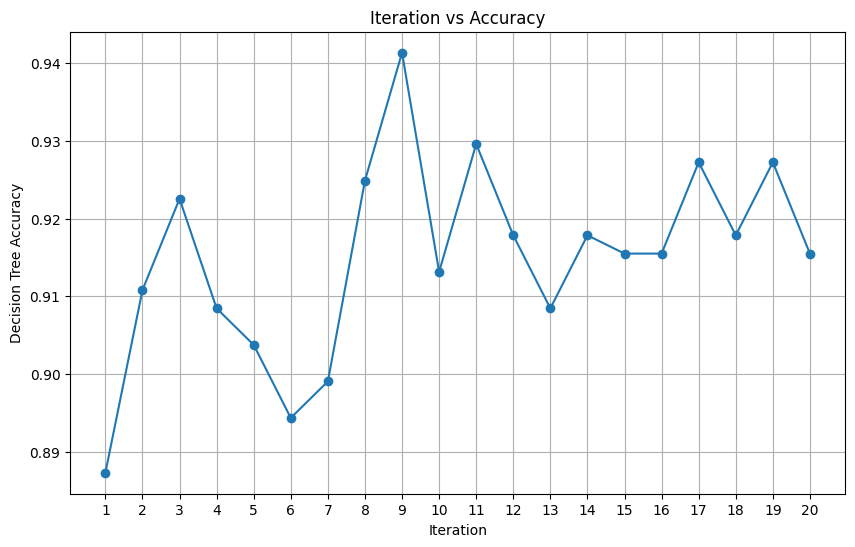

In [ ]:
# Plot the accuracies for each iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), dt_accuracies, marker='o')
plt.xticks(range(1, num_iterations + 1))  # Set x-axis ticks to include all iterations from 1 to 20
plt.xlabel('Iteration')
plt.ylabel('Decision Tree Accuracy')
plt.title('Iteration vs Accuracy')
plt.grid(True)
plt.show()

**CONVOLUTIONAL NEURAL NETWORK**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')


In [ ]:
# Define features (X) and target variable (y)
X = data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
          'light_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability',
          'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
          'mean_value_of_long_term_variability']]
y = data['fetal_health']


In [ ]:
report = classification_report(y_test, cnn_predictions)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.77      1.00      0.87       328
           2       0.00      0.00      0.00        64
           3       0.00      0.00      0.00        34

    accuracy                           0.77       426
   macro avg       0.26      0.33      0.29       426
weighted avg       0.59      0.77      0.67       426



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


# Set the number of iterations
num_iterations = 20
accuracies = []
# Perform 20 iterations
for iteration in range(num_iterations):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # Standardize the input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape data for 1D CNN
    X_train_reshaped = np.expand_dims(X_train_scaled, axis=2)
    X_test_reshaped = np.expand_dims(X_test_scaled, axis=2)

    # Build 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluate the model on the test set
    cnn_predictions = np.round(model.predict(X_test_reshaped)).flatten()
    cnn_accuracy = accuracy_score(y_test, cnn_predictions)


    # Print the accuracies for each iteration

    print(f'Iteration {iteration + 1} Accuracy:',cnn_accuracy)
    print()
    accuracies.append(cnn_accuracy)





14/14 [==============================] - 0s 6ms/step
Iteration 1 Accuracy: 0.7652582159624414

14/14 [==============================] - 0s 5ms/step
Iteration 2 Accuracy: 0.7652582159624414

14/14 [==============================] - 0s 5ms/step
Iteration 3 Accuracy: 0.8028169014084507

14/14 [==============================] - 0s 6ms/step
Iteration 4 Accuracy: 0.8051643192488263

14/14 [==============================] - 0s 2ms/step
Iteration 5 Accuracy: 0.784037558685446

14/14 [==============================] - 0s 2ms/step
Iteration 6 Accuracy: 0.7863849765258216

14/14 [==============================] - 0s 2ms/step
Iteration 7 Accuracy: 0.8051643192488263

14/14 [==============================] - 0s 2ms/step
Iteration 8 Accuracy: 0.7723004694835681

14/14 [==============================] - 0s 3ms/step
Iteration 9 Accuracy: 0.795774647887324

14/14 [==============================] - 0s 2ms/step
Iteration 10 Accuracy: 0.8075117370892019

14/14 [==============================] - 0s 2ms/ste

In [ ]:
print(f'Average CNN Accuracy over 20 iterations: {cnn_accuracy}')

Average CNN Accuracy over 20 iterations: 0.7699530516431925


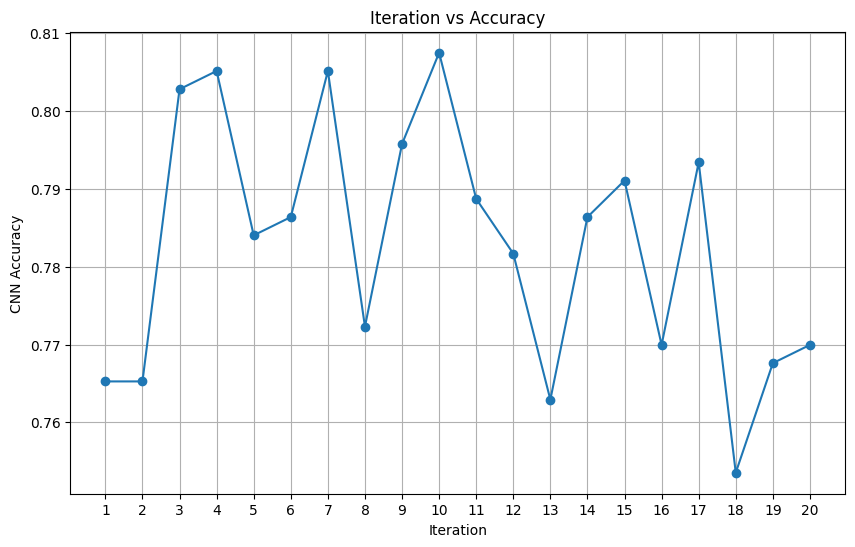

In [ ]:
# Plot iteration vs accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), accuracies, marker='o')
plt.xticks(range(1, len(accuracies) + 1))
plt.xlabel('Iteration')
plt.ylabel('CNN Accuracy')
plt.title('Iteration vs Accuracy')
plt.grid(True)
plt.show()

**NAIVE BAYES**

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')


In [ ]:
# Define features (X) and target variable (y)
X = data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
          'light_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability',
          'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
          'mean_value_of_long_term_variability']]
y = data['fetal_health']


In [ ]:
report = classification_report(y_test, nb_predictions)
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.87      0.91       328
           2       0.51      0.81      0.63        64
           3       0.63      0.50      0.56        34

    accuracy                           0.83       426
   macro avg       0.70      0.73      0.70       426
weighted avg       0.86      0.83      0.84       426



In [ ]:
# Set the number of iterations
num_iterations = 20
# Initialize lists to store accuracies and iteration numbers
nb_accuracies = []
iteration_list = []



In [ ]:
# Initialize lists to store accuracies and iteration numbers
nb_accuracies = []

# Perform 20 iterations
for iteration in range(num_iterations):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # Naive Bayes model
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X_train, y_train)
    nb_predictions = naive_bayes_model.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)

    # Store accuracy for each iteration
    nb_accuracies.append(nb_accuracy)

   # Print the accuracies for each iteration
    print(f'Iteration {iteration + 1} Naive Bayes Accuracy:',nb_accuracy)




Iteration 1 Naive Bayes Accuracy: 0.8004694835680751
Iteration 2 Naive Bayes Accuracy: 0.8403755868544601
Iteration 3 Naive Bayes Accuracy: 0.863849765258216
Iteration 4 Naive Bayes Accuracy: 0.8309859154929577
Iteration 5 Naive Bayes Accuracy: 0.8450704225352113
Iteration 6 Naive Bayes Accuracy: 0.8450704225352113
Iteration 7 Naive Bayes Accuracy: 0.852112676056338
Iteration 8 Naive Bayes Accuracy: 0.8380281690140845
Iteration 9 Naive Bayes Accuracy: 0.8427230046948356
Iteration 10 Naive Bayes Accuracy: 0.8568075117370892
Iteration 11 Naive Bayes Accuracy: 0.8544600938967136
Iteration 12 Naive Bayes Accuracy: 0.8380281690140845
Iteration 13 Naive Bayes Accuracy: 0.8333333333333334
Iteration 14 Naive Bayes Accuracy: 0.8309859154929577
Iteration 15 Naive Bayes Accuracy: 0.8145539906103286
Iteration 16 Naive Bayes Accuracy: 0.8309859154929577
Iteration 17 Naive Bayes Accuracy: 0.8380281690140845
Iteration 18 Naive Bayes Accuracy: 0.8192488262910798
Iteration 19 Naive Bayes Accuracy: 0.84

In [ ]:
# Calculate average accuracy
avg_accuracy = np.mean(nb_accuracies)
print(f'Average Naive Bayes Accuracy over 20 iterations: {avg_accuracy}')

Average Naive Bayes Accuracy over 20 iterations: 0.8376760563380282


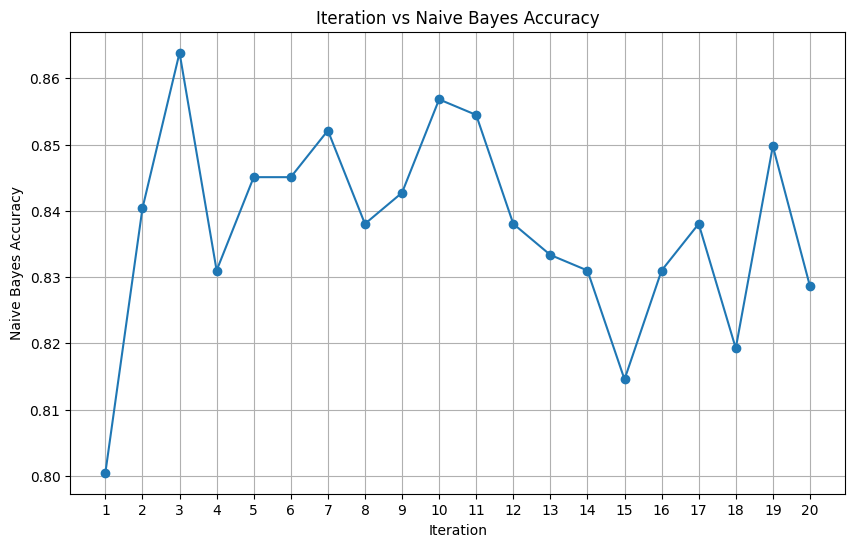

In [ ]:
# Plot iteration vs accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), nb_accuracies, marker='o')
plt.xticks(range(1, len(accuracies) + 1))
plt.xlabel('Iteration')
plt.ylabel('Naive Bayes Accuracy')
plt.title('Iteration vs Naive Bayes Accuracy')
plt.grid(True)
plt.show()

**SUPPORT VECTOR MACHINE**

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')


In [ ]:
# Define features (X) and target variable (y)
X = data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
          'light_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability',
          'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
          'mean_value_of_long_term_variability']]
y = data['fetal_health']


In [ ]:
report = classification_report(y_test, svm_predictions)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.98      0.91       328
           2       0.64      0.47      0.54        64
           3       0.80      0.12      0.21        34

    accuracy                           0.83       426
   macro avg       0.77      0.52      0.55       426
weighted avg       0.82      0.83      0.80       426



In [ ]:
# Set the number of iterations
num_iterations = 20
# Initialize lists to store accuracies and iteration numbers
svm_accuracies = []
iteration_list = []



In [ ]:
# Initialize lists to store accuracies and iteration numbers
svm_accuracies = []

# Perform 20 iterations
for iteration in range(num_iterations):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # SVM model
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)

    # Store accuracy for each iteration
    svm_accuracies.append(svm_accuracy)

     # Print the accuracies for each iteration
    print(f'Iteration {iteration + 1}  Support Vector Machine Accuracy:',svm_accuracy)




Iteration 1  Support Vector Machine Accuracy: 0.8169014084507042
Iteration 2  Support Vector Machine Accuracy: 0.8333333333333334
Iteration 3  Support Vector Machine Accuracy: 0.8474178403755869
Iteration 4  Support Vector Machine Accuracy: 0.8474178403755869
Iteration 5  Support Vector Machine Accuracy: 0.8380281690140845
Iteration 6  Support Vector Machine Accuracy: 0.8169014084507042
Iteration 7  Support Vector Machine Accuracy: 0.8474178403755869
Iteration 8  Support Vector Machine Accuracy: 0.812206572769953
Iteration 9  Support Vector Machine Accuracy: 0.8356807511737089
Iteration 10  Support Vector Machine Accuracy: 0.852112676056338
Iteration 11  Support Vector Machine Accuracy: 0.8497652582159625
Iteration 12  Support Vector Machine Accuracy: 0.863849765258216
Iteration 13  Support Vector Machine Accuracy: 0.8192488262910798
Iteration 14  Support Vector Machine Accuracy: 0.8403755868544601
Iteration 15  Support Vector Machine Accuracy: 0.8215962441314554
Iteration 16  Support 

In [ ]:
# Calculate average accuracy
avg_accuracy = np.mean(svm_accuracies)
print(f'Average Support Vector Machine Accuracy over 20 iterations: {avg_accuracy}')

Average Support Vector Machine Accuracy over 20 iterations: 0.8347417840375586


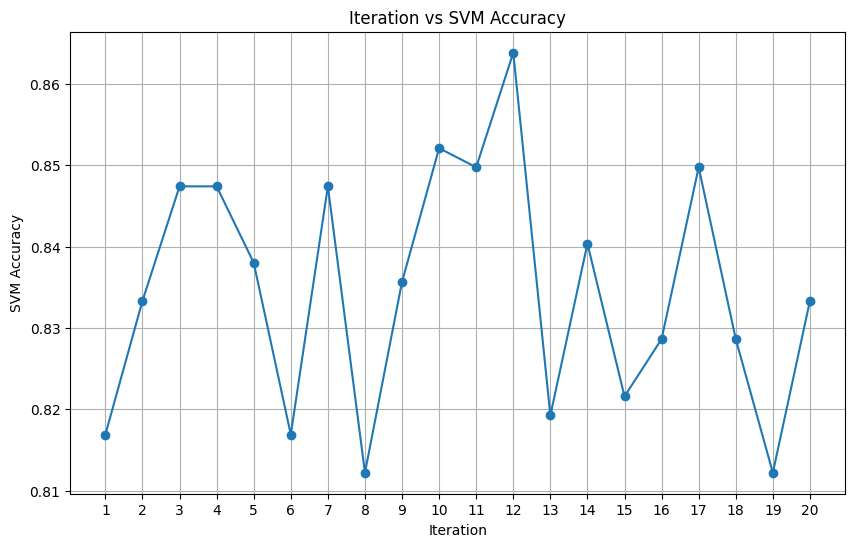

In [ ]:
# Plot iteration vs accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), svm_accuracies, marker='o')
plt.xticks(range(1, num_iterations + 1))
plt.xlabel('Iteration')
plt.ylabel('SVM Accuracy')
plt.title('Iteration vs SVM Accuracy')
plt.grid(True)
plt.show()